# Table of Content

1. [Introduction](#INTRODUCTION)
    1. [TL-DR;Summary](#TL-DR;-Summary)
    1. [Linear Regression](#Linear-Regression)
    1. [Conditions of Application](#Conditions-of-application)
1. [Building the Model](#Building-the-Model)
    1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
	1. [Initial Model](#Initial-Model)
	1. [Initial Diagnose](#Initial-Diagnose)
	1. [Final Diagnostics](#Final-Diagnostics)
        1. [Normality of the residuals](#Normality-of-the-residuals)
		1. [Homoscedasticity](#Homoscedasticity)
		1. [Outlier](#Outlier)
1.[Model Interpretation and Conclusions](#Model-Interpretation-and-Conclusions)
1.[Sources](#Sources)

# INTRODUCTION

The analysis and modelling in this notebook goal is to answer this question: <br>
**Create multiple linear regression analysis of “mtcars” data, then create a model to predict mpg (miles per gallon) using best variable(s) available. Explain the diagnostic tests and make a conclusion about the model!**
<br>

The data source can be accessed [here][1]. <br>

[1]: https://www.kaggle.com/datasets/ruiromanini/mtcars

## TL-DR; Summary

- From the multiple linear regression analysis of mtcars data, we found our model, that is:
<center>$mpg = 9.62 - 3.92(wt) + 1.23(qsec) + 2.94(am)$</center>

- The diagnostic test of the final model satisfy all the condition of application.

- In conclusion we can interpret the model as follow: <br>
The Miles/(US) gallon ( mpg ) data is negatively dependent on the Weight (1000 lbs) of the car ( wt ), positively correlated with 1/4 mile time ( qsec ) and Transmission (0 = automatic, 1 = manual) ( am ).

## Linear Regression

There are two types of linear regression:

1. Simple linear regression is a statistical approach that allows to assess the linear relationship between two quantitative variables. More precisely, it enables the relationship to be quantified and its significance to be evaluated.
2. Multiple linear regression is a generalization of simple linear regression, in the sense that this approach makes it possible to evaluate the linear relationships between a response variable (quantitative) and several explanatory variables (quantitative or qualitative).

What makes linear regression a powerful statistical tool is that it allows to quantify by what quantity the response/dependent  variable (usually denoted as Y or target) varies when the explanatory/independent variable (usually denoted as X or features) increases by one unit.

Simple (Multiple) linear regression allows to evaluate the existence of a linear relationship between two (many) variables and to quantify this link. Note that **linearity is a strong assumption** in linear regression in the sense that it tests and quantifies whether the two variables are _linearly_ dependent.

## Conditions of application

Linear regression cannot be used in all situations. In addition to the requirement that the dependent variable must be a continuous quantitative variables, simple linear regression requires that the data satisfy the following conditions:

1. **Linearity**: The relationship between the two variables should be linear (at least roughly). For this reason it is always necessary to represent graphically the data with a scatterplot before performing a simple linear regression.
1. **Independence**: Observations must be independent.
1. **Normality of the residuals**: the residuals ( εi ) are normally distributed and its expected value (mean),  E(εi|Xi) , is zero. For small sample sizes, residuals should follow a normal distribution. This condition can be tested visually (via a QQ-plot and/or a histogram), or more formally (via the Shapiro-Wilk test for instance).
1. **Homoscedasticity of the residuals** (equality of variance): The variance of the errors Var(εi|Xi) should be constant. There is a lack of homoscedasticity when the dispersion of the residuals increases with the predicted values (fitted values). This condition can be tested visually (by plotting the standardized residuals vs. the fitted values) or more formally (via the Breusch-Pagan test).
1. No influential points: If the data contain **outliers**, it is essential to identify them so that they do not, on their own, influence the results of the regression. This can be tackled by identifying outliers (via the Cook’s distance or the leverage index for instance), and comparing the results with and without the potential outliers. Do the results remain the same with the two approaches? If yes, outliers are not really an issue in this case. If results are much different, you can use the Theil-Sen estimator, robust regression or quantile regression which are all more robust to outliers.
1. (For multiple linear regression) **No multicollinearity**: Multicollinearity arises when there is a strong linear correlation between the independent variables, conditional on the other variables in the model. It can be assessed by studying the correlation between each pair of independent variables, or even better, by computing the variance inflation factor (VIF). The VIF measures how much the variance of an estimated regression coefficient increases, relative to a situation in which the explanatory variables are strictly independent. A high value of VIF is a sign of multicollinearity (the threshold is generally admitted at 5 or 10 depending on the domain). The easiest way to reduce the VIF is to remove some correlated independent variables, or eventually to standardize the data.

If any of the condition is not met, the tests and the conclusions could be erroneous so it is best to avoid using and interpreting the model. If this is the case, often the conditions can be met by transforming (e.g., logarithmic transformation, square or square root, Box-Cox transformation, etc.) the data. If it does not help, it could be worth thinking about removing some variables or adding other variables, or even considering other types of models such as non-linear models.

Keep in mind that, **conditions of application should be verified before drawing any conclusion based on the model.**

# Building the Model

We'll start building the model by importing the necessary libraries and the data into our notebook.

In [1]:
import logging
logging.captureWarnings(True)

# basic library
import pandas as pd
import numpy as np
import scipy.stats as stats

# viz library
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline

# ML library
# from sklearn import metrics
# from sklearn import linear_model
# from sklearn import datasets, linear_model
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the data and show the first 5 rows
mtcars = pd.read_csv("mtcars.csv")
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Columns explanation:
- **mpg** Miles/(US) gallon
- **cyl** Number of cylinders
- **disp** Displacement (cu.in.)
- **hp** Gross horsepower
- **drat** Rear axle ratio
- **wt** Weight (1000 lbs)
- **qsec** 1/4 mile time
- **vs** V/S
- **am** Transmission (0 = automatic, 1 = manual)
- **gear** Number of forward gears
- **carb** Number of carburetors

## Exploratory Data Analysis

Before we jump into the model, it's a good idea to take a look at our data so we know roughly what we're dealing with. In this case we will to an exploratory data analysis (EDA).

In [3]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [4]:
# check for duplicates and null values
print('sum of duplicated values: {}\n'.format(mtcars.duplicated().sum()))
print('sum of null values:\n{}'.format(mtcars.isnull().sum()))

sum of duplicated values: 0

sum of null values: model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64


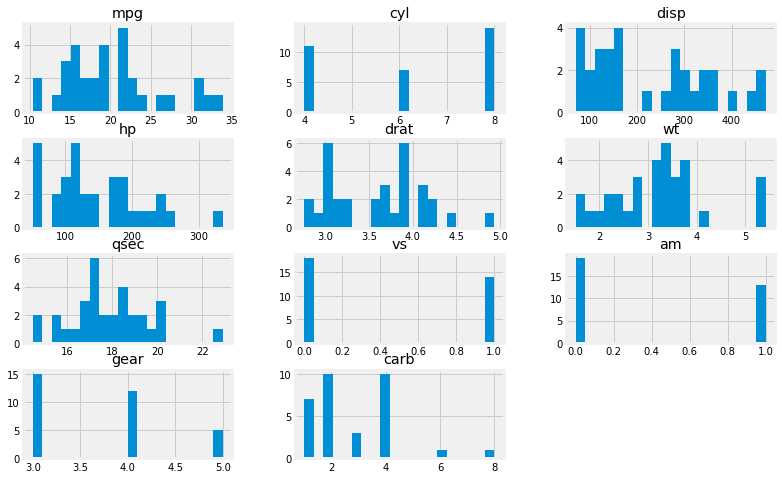

In [5]:
# let's visualize the distribution of the features of the cars
mtcars.hist(
    figsize=(12,8)
    ,bins=20
)
plt.show()

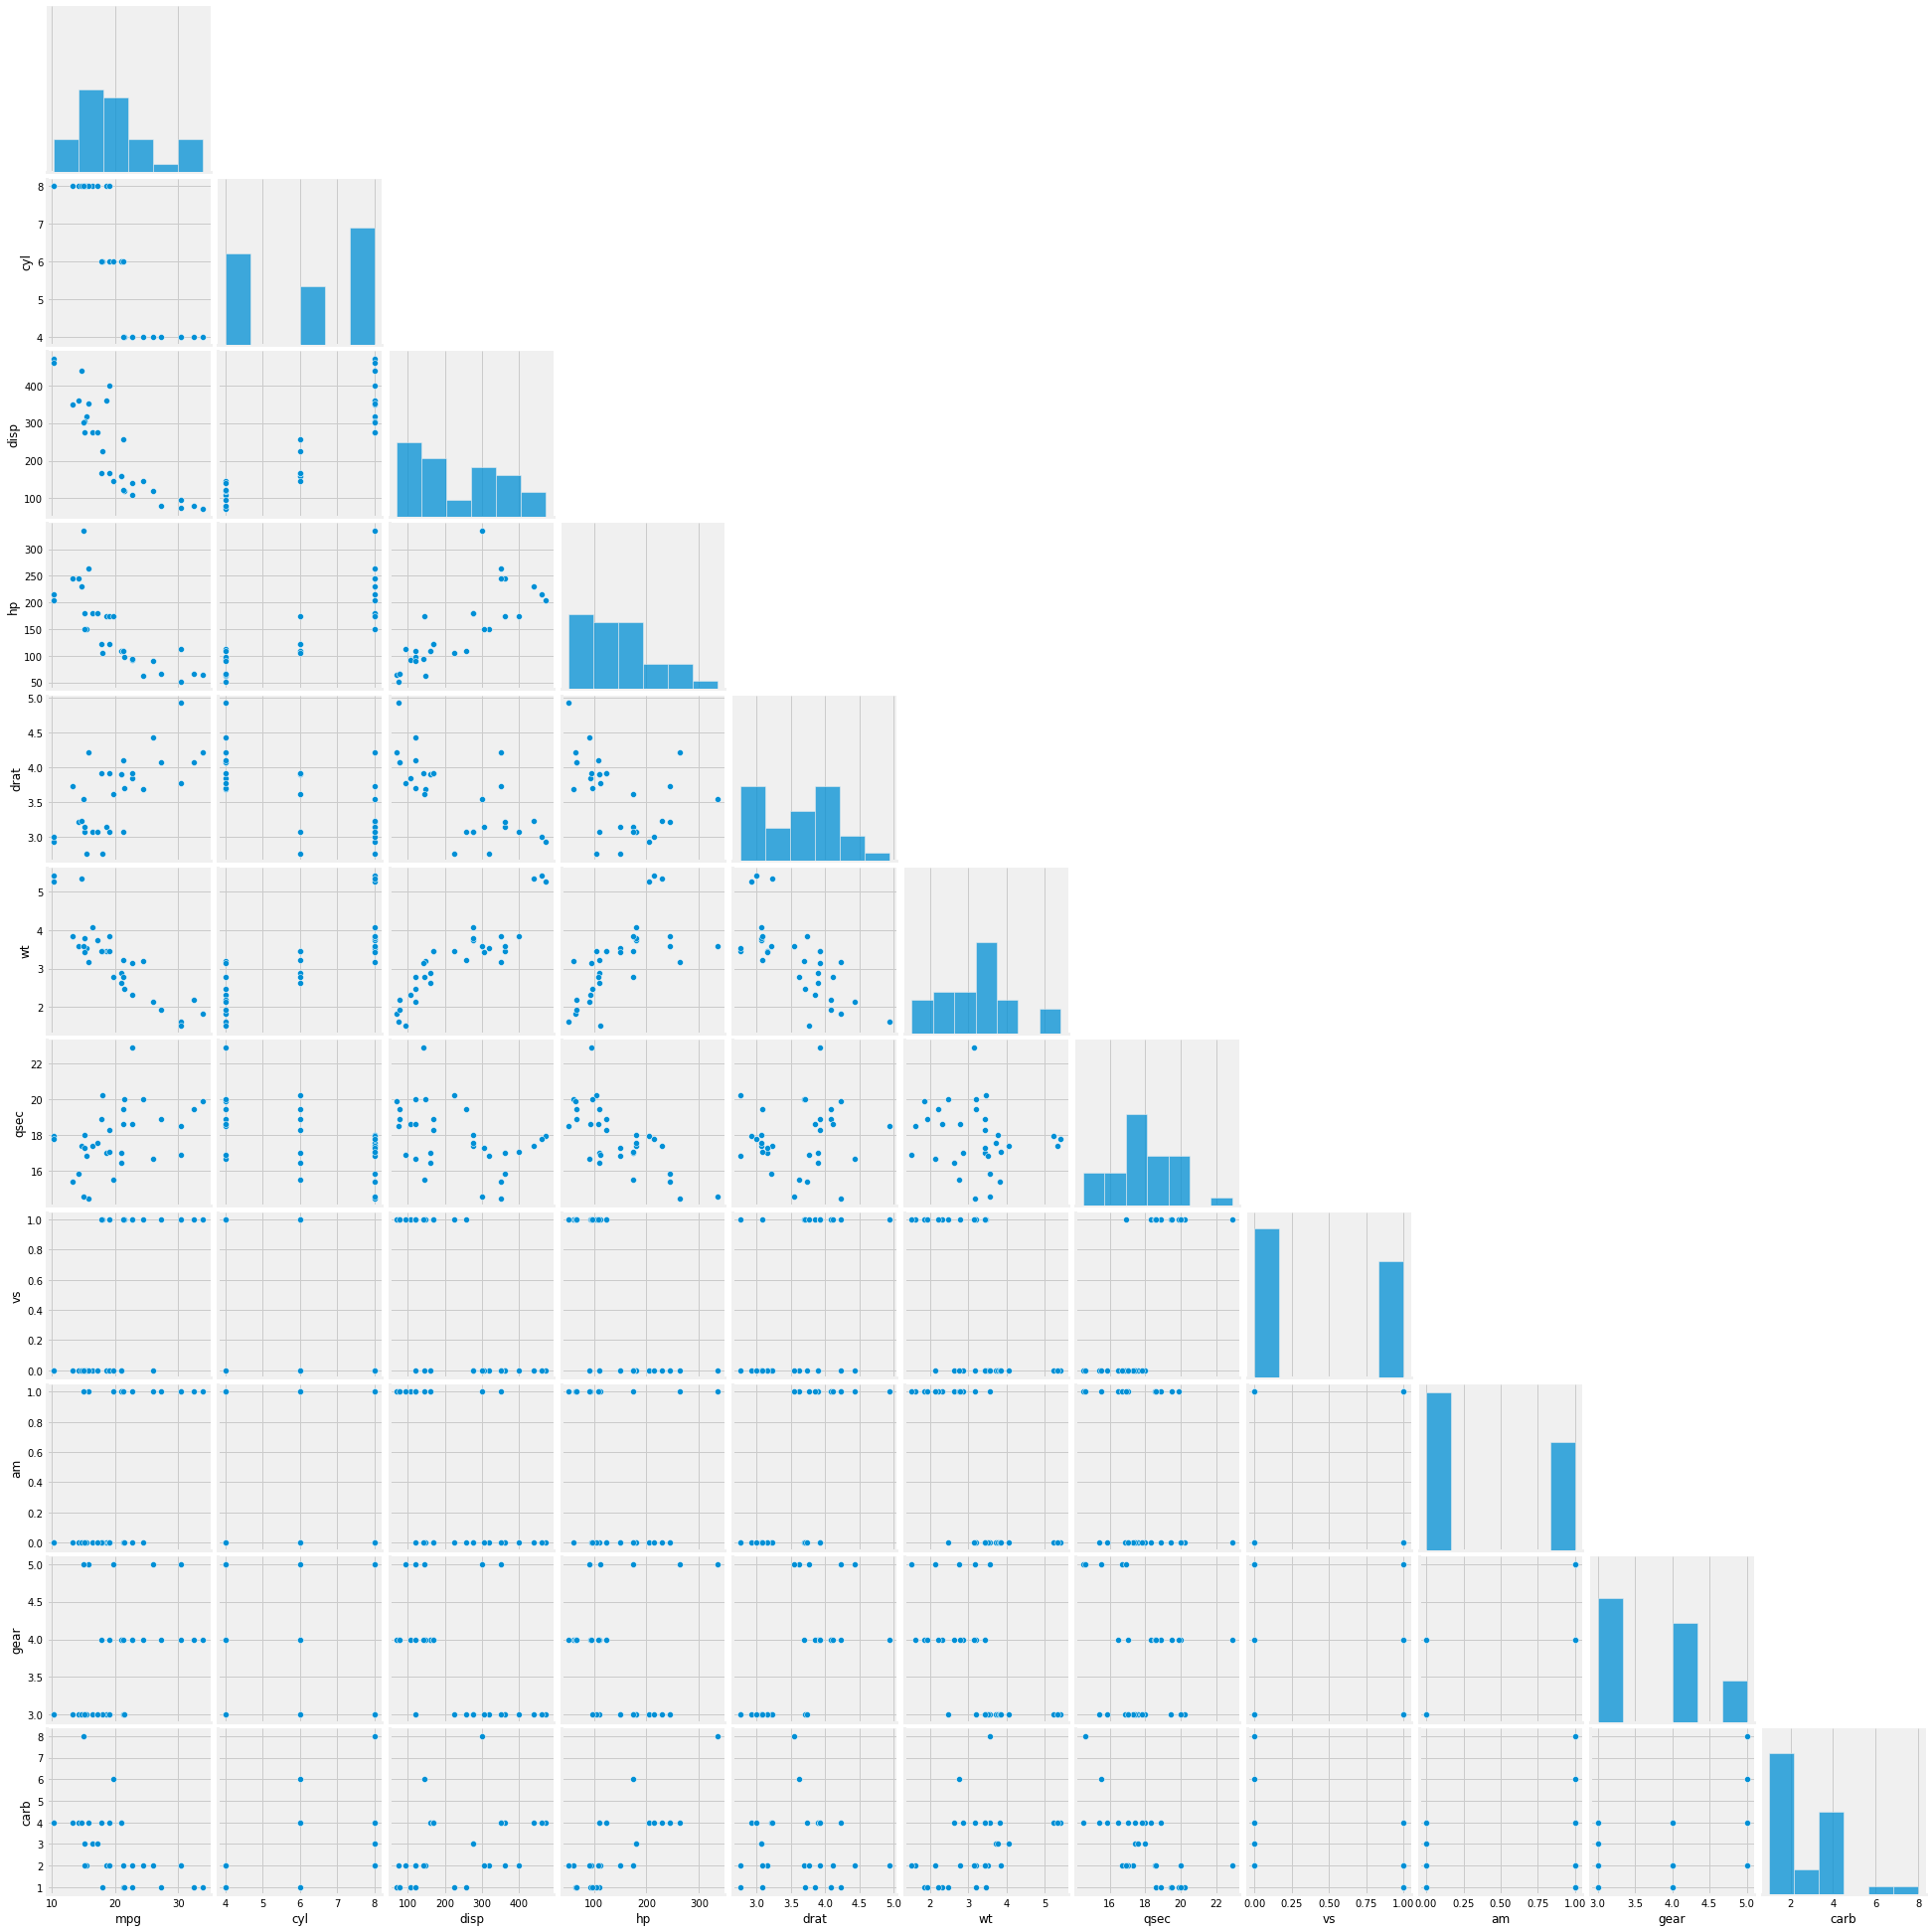

In [6]:
sns.pairplot(
    data = mtcars,
    corner=True
)

## Initial Model

In [7]:
# initiate target and features
X=mtcars.iloc[:,2:]
Y=mtcars.mpg

X2 = sm.add_constant(X)

In [8]:
# create a model with all features
est = sm.OLS(Y, X2).fit()
print(est.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.807   
Dependent Variable: mpg              AIC:                161.7098
Date:               2022-08-09 17:10 BIC:                177.8329
No. Observations:   32               Log-Likelihood:     -69.855 
Df Model:           10               F-statistic:        13.93   
Df Residuals:       21               Prob (F-statistic): 3.79e-07
R-squared:          0.869            Scale:              7.0235  
-------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
const    12.3034    18.7179    0.6573   0.5181   -26.6226   51.2293
cyl      -0.1114     1.0450   -0.1066   0.9161    -2.2847    2.0618
disp      0.0133     0.0179    0.7468   0.4635    -0.0238    0.0505
hp       -0.0215     0.0218   -0.9868   0.3350    -0.0668    0.0238
drat      0.7

## Initial Diagnose

**Adjusted R Squared**<br>
The initial model have a relatively good value of adjusted R-squared _0.807_ which means that 80.7% of the variability of the distance traveled with a gallon is explained by all the features in the data. The relatively high R<sup>2</sup> means that all the available features are good characteristics to explain the distance it can drive with a gallon of fuel.
<br><br>
**Multicollinearity**<br>
However, the model has a high condition no _1.22e+04_, implying that the model is affected by **multicollinearity**, thus we can't take into account all of the features available, we will select some of the features to be used in the final model. We will deal with this problem by studying the correlation between each pair of independent variables. We wil also check their VIF value.

<AxesSubplot:>

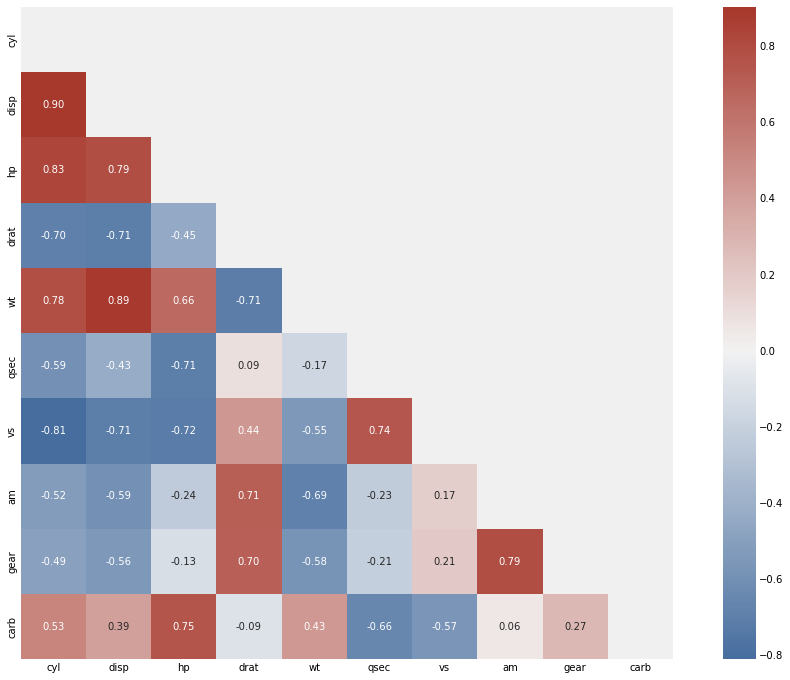

In [9]:
# https://www.kdnuggets.com/2021/04/awesome-tricks-best-practices-kaggle.html

# Calculate pairwise-correlation
matrix = X.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, 
                             center="light", 
                             as_cmap=True
                            )

plt.figure(figsize=(16, 12))

sns.heatmap(matrix, mask=mask, center=0, annot=True, 
            fmt='.2f', square=True, cmap=cmap)

# plt.show();

From the correlation matrix, we can separate some of the features into group based on their correlation, we'll focus on a pair of features with high correlation (>0.7).

- cyl: vs, drat, hp, disp
- hp: carb, vs, qsec
- drat: gear, am

We have to choose just one feature from each group to prevent multicollinearity.

In [10]:
vif=[variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
vif_factor=pd.DataFrame({'VIF': vif},index=X.columns)
vif_factor['p-values']=est.pvalues[1:]
vif_factor.sort_values(by='p-values')

,VIF,p-values
wt,182.948049,0.063252
am,7.412020,0.233990
qsec,317.534376,0.273941
hp,56.047781,0.334955
disp,98.930791,0.463489
drat,132.214353,0.635278
gear,119.804879,0.665206
carb,32.213836,0.812179
vs,8.752581,0.881423
cyl,112.629828,0.916087


Since most of the features have high value of VIF (only am and vs have <10 VIF value), we'll use the p-value to choose the features. In this case, aligned with the group we have created previously, we'll use **wt, am, qsec**

In [11]:
# build MLR model with features wt, qsec, am

X3 = X2[['const','wt','qsec','am']]
est2 = sm.OLS(Y, X3).fit()
print(est2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.834   
Dependent Variable: mpg              AIC:                152.1194
Date:               2022-08-09 17:10 BIC:                157.9823
No. Observations:   32               Log-Likelihood:     -72.060 
Df Model:           3                F-statistic:        52.75   
Df Residuals:       28               Prob (F-statistic): 1.21e-11
R-squared:          0.850            Scale:              6.0459  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      9.6178     6.9596    1.3819   0.1779   -4.6383   23.8739
wt        -3.9165     0.7112   -5.5069   0.0000   -5.3733   -2.4597
qsec       1.2259     0.2887    4.2467   0.0002    0.6346    1.8172
am         2.9358     1.4109    2.0808   0.0467    0.0457    5.8259
-------------

## Final Diagnostics

Before we make an interpretation/conclusion of the model, let's check wheter we have fullfiled the rest of the [condition of application](#Conditions-of-application)

### Normality of the residuals
In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot.

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. This is an indication that simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

From the 2 graph below, we can safely say that: **the residuals follow the approximate normal distribution.**

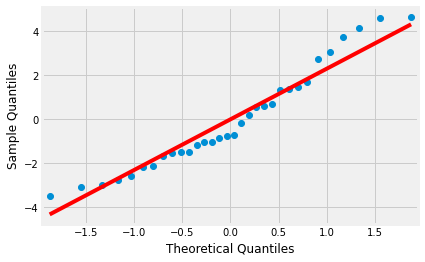

In [12]:
# Test for Normality of Residuals

# sm.ProbPlot(est2.resid).ppplot(line='45')
sm.qqplot(est2.resid, line='s')
plt.show()

<AxesSubplot:ylabel='Density'>

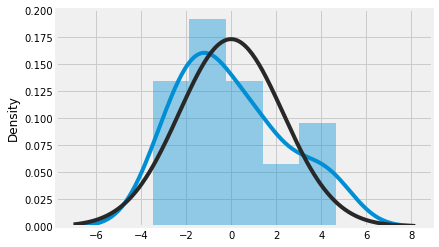

In [13]:
sns.distplot(est2.resid, fit=stats.norm)

### Homoscedasticity

From the plot below, we see that the residuals appear to be random. This implies the residuals have constant variance (homoscedasticity).

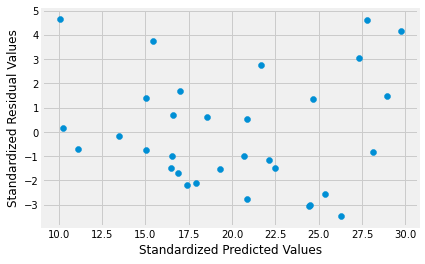

In [14]:
# Homoscedasticity test:

def standardized_values(vals):
    return (vals - vals.mean())/vals.std()

plt.scatter(est2.fittedvalues, est2.resid)
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

### Outlier

There is no outlier in this dataset from final model because Cook’s distance for all the data points is less than 1.

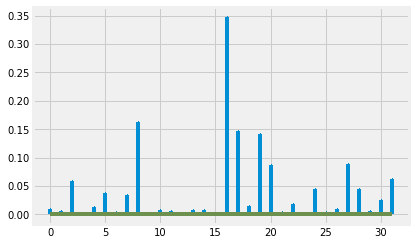

In [15]:
# Check for Outlier:

mlr_inf = est2.get_influence()
(c, p) = mlr_inf.cooks_distance
plt.stem(np.arange(len(X)), np.round(c, 3), markerfmt=',')
plt.show()

# Model Interpretation and Conclusions

The table `Results` gives the estimate for each parameter (column `Coef`), together with the p-value of the nullity of the parameter (column P>|t|).

The hypotheses are:

H<sub>0</sub>:β<sub>j</sub>=0 (there is no (linear) relationship between the two variables) <br>
H<sub>1</sub>:β<sub>j</sub>≠0 (there is (linear) relationship between the two variables)

The test of β<sub>j</sub>=0 is equivalent to testing the hypothesis: is the dependent variable associated with the independent variable studied, all other things being equal, that is to say, at constant level of the other independent variables.

Here is the equation: <br>

<center>$mpg = 9.62 - 3.92(wt) + 1.23(qsec) + 2.94(am)$</center>

Based on the output of our model, we conclude that:

- There is a significant and negative relationship between miles/gallon and `wt`, all else being equal. So for an increase of one unit in the weight (that is, an increase of 1000 lbs), the number of miles/gallon decreases, on average, by 3.92, for a constant level of `qsec` and `am` (p-value < 0.001).
- There is a significant and positive relationship between miles/gallon and `qsec`, all else being equal. So for an increase of one unit in the qsec, the number of miles/gallon increases, on average, by 1.23, for a constant level of `wt` and `am` (p-value < 0.001).
- There is a significant and positive relationship between miles/gallon and `am`, all else being equal. So for a car with automatic transmission, the number of miles/gallon increases, on average, by 2.94, for a constant level of `qsec` and `wt` (p-value < 0.001).

# Sources
- https://statsandr.com/blog/multiple-linear-regression-made-simple/
- https://www.kaggle.com/code/elsapuspa/dataset-mtcars-multiple-linear-regression-python
- https://www.kaggle.com/code/hamelg/python-for-data-27-linear-regression/notebook
- https://medium.com/@abhilash.sirigari/a-complete-model-diagnostics-of-multivariate-linear-regression-90aace20ecaf
- https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a
- https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/